begin...
end


C:\Users\53182\AppData\Local\Temp\ipykernel_76024\3677212782.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


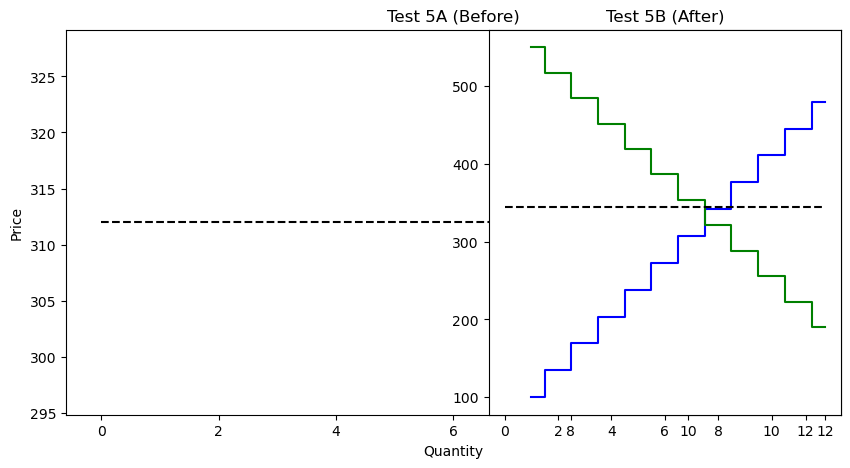

In [10]:
import BSE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

t_period = 60
end_5a = 4 * 60
total_time = 7 * 60

b_list = []
b_list.append(('ZIP', 4))
b_list.append(('SHVR', 4))
b_list.append(('ZIC', 4))

s_list = []
s_list.append(('ZIP', 4))
s_list.append(('SHVR', 4))
s_list.append(('ZIC', 4))

range_s = (100, 480)
range_d1 = (480, 120)
range_d2 = (550, 190)

sess_id = 'q2_exp_run'
dump = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True, 
        'dump_avgbals': False, 'dump_tape': False}

print("begin...")
BSE.market_session(sess_id, 0, total_time, traders, order_s, dump, False)
print("end")

x_axis = []
for i in range(1, 13):
    x_axis.append(i)

s_p = []
step_s = (480 - 100) / 11
for i in range(12):
    p = 100 + i * step_s
    s_p.append(p)

d_p1 = []
step_d1 = (480 - 120) / 11
for i in range(12):
    p = 480 - i * step_d1
    d_p1.append(p)

d_p2 = []
step_d2 = (550 - 190) / 11
for i in range(12):
    p = 550 - i * step_d2
    d_p2.append(p)

eq1 = 312
eq2 = 345

plt.figure(1, figsize=(10, 5))

plt.plot([0, 12], [eq1, eq1], 'k--')
plt.title('Test 5A (Before)')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_axis, s_p, where='mid', label='Supply', color='b')
plt.step(x_axis, d_p2, where='mid', label='Demand', color='g')
plt.plot([0, 12], [eq2, eq2], 'k--')
plt.title('Test 5B (After)')

plt.savefig('q2_fig1.png')
plt.show()